<a href="https://colab.research.google.com/github/tooruui39/marketing-project/blob/main/%E7%94%A2%E7%A8%8B%E8%80%97%E6%90%8D%E6%88%90%E6%9C%AC%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
myfolder = "drive/My Drive/Learn-Statistics/DATA/"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv(myfolder + "productQuality.csv")

dataset.head()

,module1_accuracy,module2_accuracy,module3_accuracy,module4_accuracy,module5_accuracy,module6_accuracy,module7_accuracy,module8_accuracy,module9_accuracy,module10_accuracy,...,machine4_year_from_buy,machine1_month_from_maintenance,machine2_month_from_maintenance,machine3_month_from_maintenance,machine4_month_from_maintenance,average_age,average_skill_score,temperature,humidity,accuracy
0,-0.0628,-1.3199,-0.2871,-0.2214,0.4023,-0.0045,1.6871,0.7589,0.1716,0.5738,...,4,10,8,4,1,39.4,3.0,29.9,80,99.19144
1,-0.2412,-0.9271,0.9078,-0.1451,0.1485,0.2985,-2.0658,-0.9010,-0.0579,1.1854,...,4,6,10,2,11,49.2,2.8,17.3,20,98.75599
2,0.6312,1.2003,2.5487,1.3827,-0.0203,0.7617,1.3028,0.2420,0.5030,0.9819,...,3,8,12,5,5,43.0,3.1,26.6,70,99.36117
3,0.4498,-0.3274,3.7995,0.5035,0.7337,1.2836,-0.4374,-0.2216,0.5888,0.7855,...,2,4,9,8,2,43.8,2.3,25.0,60,99.00996
4,-0.8805,-1.6132,0.3942,-1.2193,-0.0399,0.1058,6.0260,-0.7853,0.6531,0.8569,...,1,1,3,9,8,43.1,2.8,16.9,10,98.40613


In [ ]:
dataset.columns

Index(['module1_accuracy', 'module2_accuracy', 'module3_accuracy',
       'module4_accuracy', 'module5_accuracy', 'module6_accuracy',
       'module7_accuracy', 'module8_accuracy', 'module9_accuracy',
       'module10_accuracy', 'module11_accuracy', 'machine1_year_from_buy',
       'machine2_year_from_buy', 'machine3_year_from_buy',
       'machine4_year_from_buy', 'machine1_month_from_maintenance',
       'machine2_month_from_maintenance', 'machine3_month_from_maintenance',
       'machine4_month_from_maintenance', 'average_age', 'average_skill_score',
       'temperature', 'humidity', 'accuracy'],
      dtype='object')

In [ ]:
dataset.shape

(2439, 24)

In [ ]:
dataset.describe()

,module1_accuracy,module2_accuracy,module3_accuracy,module4_accuracy,module5_accuracy,module6_accuracy,module7_accuracy,module8_accuracy,module9_accuracy,module10_accuracy,...,machine4_year_from_buy,machine1_month_from_maintenance,machine2_month_from_maintenance,machine3_month_from_maintenance,machine4_month_from_maintenance,average_age,average_skill_score,temperature,humidity,accuracy
count,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,...,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000
mean,0.003728,0.040659,0.019069,0.015893,-0.002634,0.005222,0.164374,0.007691,0.019176,0.992979,...,1.997950,6.482165,6.532595,6.606806,6.584666,45.091226,3.003198,21.957565,34.079541,99.003001
std,0.396647,1.077579,1.835102,0.798114,0.545336,0.560596,2.610016,0.549883,0.384527,0.404973,...,1.426773,3.477513,3.426909,3.413043,3.406688,5.121639,0.497267,5.137753,25.974909,0.236074
min,-1.349100,-3.485900,-7.052600,-2.418100,-1.880600,-2.322300,-8.414200,-1.894600,-1.217100,-0.746000,...,0.000000,1.000000,1.000000,1.000000,1.000000,28.400000,1.200000,4.700000,0.000000,98.199210
25%,-0.246300,-0.670500,-1.258150,-0.562900,-0.362200,-0.380650,-1.554750,-0.375050,-0.243550,0.718300,...,1.000000,3.000000,4.000000,4.000000,4.000000,41.800000,2.700000,18.600000,20.000000,98.845190
50%,0.004600,0.051600,0.016000,-0.003600,0.010000,0.003500,0.117900,0.009600,0.013100,0.995000,...,2.000000,6.000000,7.000000,7.000000,7.000000,45.100000,3.000000,22.000000,30.000000,99.004130
75%,0.268400,0.758250,1.275950,0.600950,0.377050,0.372500,1.900400,0.379050,0.278300,1.270750,...,3.000000,9.500000,10.000000,10.000000,9.000000,48.400000,3.300000,25.300000,50.000000,99.161620
max,1.430000,3.650600,7.131000,2.545800,1.938700,2.130100,8.319900,1.766100,1.301900,2.323400,...,4.000000,12.000000,12.000000,12.000000,12.000000,64.600000,4.600000,36.900000,130.000000,99.819900


In [ ]:
stdobj = StandardScaler()
stdobj.fit(dataset)

std_dataset = pd.DataFrame(stdobj.transform(dataset),columns=(dataset.columns))
std_dataset.head()

,module1_accuracy,module2_accuracy,module3_accuracy,module4_accuracy,module5_accuracy,module6_accuracy,module7_accuracy,module8_accuracy,module9_accuracy,module10_accuracy,...,machine4_year_from_buy,machine1_month_from_maintenance,machine2_month_from_maintenance,machine3_month_from_maintenance,machine4_month_from_maintenance,average_age,average_skill_score,temperature,humidity,accuracy
0,-0.167761,-1.262866,-0.166875,-0.297378,0.742693,-0.017346,0.583536,1.366405,0.396475,-1.035291,...,1.403489,1.011802,0.428288,-0.763934,-1.639660,-1.111440,-0.006433,1.546214,1.768240,0.798386
1,-0.617623,-0.898270,0.484394,-0.201758,0.277196,0.523261,-0.854643,-1.652855,-0.200484,0.475243,...,1.403489,-0.138681,1.012024,-1.350042,1.296344,0.802403,-0.408713,-0.906723,-0.542155,-1.046544
2,1.582266,1.076375,1.378752,1.712897,-0.032402,1.349693,0.436266,0.426194,1.258489,-0.027363,...,0.702463,0.436561,1.595760,-0.470881,-0.465259,-0.408396,0.194708,0.903778,1.383174,1.517504
3,1.124838,-0.341631,2.060488,0.611074,1.350517,2.280858,-0.230610,-0.417067,1.481666,-0.512433,...,0.001437,-0.713922,0.720156,0.408281,-1.346060,-0.252164,-1.414416,0.592294,0.998108,0.029485
4,-2.229716,-1.535106,0.204462,-1.547956,-0.068350,0.179449,2.246281,-1.442404,1.648918,-0.336089,...,-0.699589,-1.576785,-1.031051,0.701334,0.415543,-0.388867,-0.408713,-0.984594,-0.927221,-2.528844


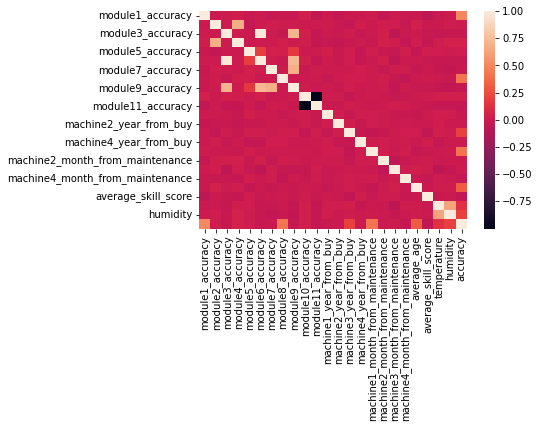

In [ ]:
sns.heatmap(std_dataset.corr())

In [ ]:
columns = ['module1_accuracy', 'module2_accuracy', 'module3_accuracy',
       'module4_accuracy', 'module5_accuracy', 'module6_accuracy',
       'module7_accuracy', 'module8_accuracy', 'module9_accuracy',
       'module10_accuracy', 'module11_accuracy', 'machine1_year_from_buy',
       'machine2_year_from_buy', 'machine3_year_from_buy',
       'machine4_year_from_buy', 'machine1_month_from_maintenance',
       'machine2_month_from_maintenance', 'machine3_month_from_maintenance',
       'machine4_month_from_maintenance', 'average_age', 'average_skill_score',
       'temperature', 'humidity']
X = std_dataset.loc[:,columns]

X_PCA = PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', random_state=None)
X_PCA.fit(X)
X_PCA.explained_variance = pd.DataFrame( X_PCA.explained_variance_ , columns=["ExplainedVariance"])
X_PCA.explained_variance

,ExplainedVariance
0,2.753797
1,2.025538
2,1.713169
3,1.623595
4,1.280321
5,1.130375
6,1.076932
7,1.072589
8,1.048039
9,1.035157


In [ ]:
X_PCA.n_components = pd.DataFrame(X_PCA.components_, columns=columns)
X_PCA.n_components

,module1_accuracy,module2_accuracy,module3_accuracy,module4_accuracy,module5_accuracy,module6_accuracy,module7_accuracy,module8_accuracy,module9_accuracy,module10_accuracy,...,machine3_year_from_buy,machine4_year_from_buy,machine1_month_from_maintenance,machine2_month_from_maintenance,machine3_month_from_maintenance,machine4_month_from_maintenance,average_age,average_skill_score,temperature,humidity
0,0.001891,-0.009092,-0.546292,-0.009388,-0.116750,-0.559211,-0.224059,0.006509,-0.559572,-0.052115,...,-0.013138,0.015078,-1.184626e-03,-0.023237,0.048665,0.002760,0.009207,0.012543,0.033357,0.037816
1,-0.055025,-0.040567,0.012677,-0.073308,0.013593,0.015058,0.065345,0.002554,0.055317,-0.682472,...,0.031943,0.002370,-4.286502e-03,-0.000294,0.038014,0.020349,-0.012748,-0.014557,-0.149140,-0.155233
2,-0.000075,-0.632143,-0.012622,-0.639489,0.021524,-0.008321,-0.011279,-0.035673,-0.013201,0.113479,...,0.019089,-0.014831,1.698790e-02,-0.066324,-0.010895,0.043057,-0.064417,0.040263,-0.264513,-0.281966
3,-0.032953,-0.291453,0.040847,-0.266291,0.079849,0.055687,-0.051435,-0.028943,0.005692,-0.116598,...,0.083271,-0.055512,4.187509e-03,-0.035578,-0.115636,0.034040,-0.012042,-0.014975,0.628721,0.613450
4,0.062947,0.000349,0.337317,0.011278,-0.132201,0.305481,-0.783975,-0.030118,-0.309644,-0.039328,...,-0.011129,-0.081755,-4.162045e-02,0.131989,-0.099907,-0.080051,0.066516,-0.042906,-0.067039,-0.043147
5,-0.238726,0.009216,-0.031745,-0.008233,0.183714,0.004645,-0.035068,0.215866,-0.020992,-0.016177,...,-0.367135,0.235852,3.151769e-01,0.408716,-0.307140,-0.094107,-0.269856,0.368856,-0.010539,-0.005319
6,0.417831,0.038544,-0.048561,0.072686,0.300825,0.010778,-0.061672,-0.083522,-0.033636,-0.011757,...,0.016009,-0.199186,4.344895e-01,-0.109853,-0.119472,0.277455,-0.369326,-0.435402,-0.034274,-0.048259
7,0.195720,-0.000793,0.069546,-0.045934,-0.297587,0.010563,0.021177,-0.572926,0.021850,-0.024541,...,-0.497395,0.259766,1.521707e-01,-0.103452,0.223756,0.125759,0.011555,0.136935,0.028237,0.088707
8,0.472409,-0.080240,-0.008801,-0.044599,-0.302953,-0.067607,0.148477,0.256634,0.051413,-0.021874,...,-0.077771,0.174154,-9.577683e-02,0.139450,-0.321526,-0.477090,-0.118948,-0.266912,0.022288,0.023550
9,0.093517,0.005929,-0.049640,0.040416,0.469039,0.042636,-0.098675,0.138407,-0.035525,-0.006676,...,-0.146631,-0.228324,-2.005367e-01,-0.377435,0.078908,-0.171064,-0.191806,0.354489,-0.005299,0.006141


In [ ]:
i = 0
cumCR = 0
CRList = []
for CR in X_PCA.explained_variance_ratio_:
  cumCR = cumCR + CR
  CRList.append([CR,cumCR])
  i = i + 1

X_PCA_contRate = pd.DataFrame(CRList,columns=["ContributionRate","CumulativeContributionRate"])
X_PCA_contRate

,ContributionRate,CumulativeContributionRate
0,1.196812e-01,0.119681
1,8.803075e-02,0.207712
2,7.445506e-02,0.282167
3,7.056213e-02,0.352729
4,5.564332e-02,0.408372
5,4.912661e-02,0.457499
6,4.680393e-02,0.504303
7,4.661518e-02,0.550918
8,4.554822e-02,0.596466
9,4.498838e-02,0.641455


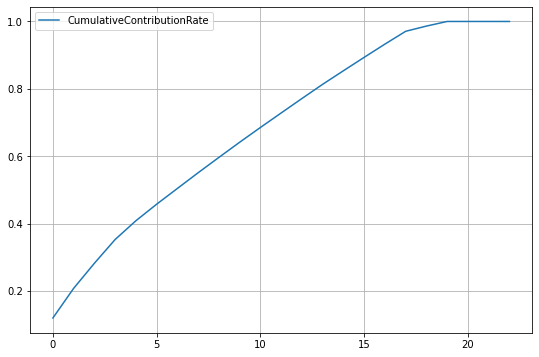

In [ ]:
X_PCA_contRate["CumulativeContributionRate"].plot(figsize=(9,6), legend='best', grid=True )

In [ ]:
feature = pd.DataFrame(X_PCA.transform(X))
feature.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.131691,0.965367,-0.273351,2.598004,-0.838343,2.560228,0.094775,0.334751,2.091122,0.926158,...,-0.400669,-0.378019,0.896607,-0.256334,-0.563245,0.109611,-0.624965,0.011925,-0.000300,-0.000614
1,-0.448686,-0.503268,1.141869,-0.477688,1.184520,1.327736,0.255722,1.672780,-0.622024,-0.975182,...,2.012276,-0.884742,-0.313350,-0.448281,-0.719447,0.217615,-0.628590,-0.002000,0.008064,0.004162
2,-2.314439,-0.464698,-2.529092,0.839630,0.252492,0.947897,0.816823,-0.287624,1.110549,-0.894010,...,-0.239057,1.480856,-0.303284,1.096286,0.644002,0.291905,-0.365150,-0.013007,0.001845,-0.001824
3,-3.251656,0.501035,-0.904317,1.306715,1.189381,-0.329025,0.872286,-0.045297,0.909199,0.263247,...,0.041682,1.009407,0.025953,-0.344030,-1.604077,0.222302,-0.538633,-0.017996,-0.002001,0.002972
4,-1.587954,1.365923,2.505221,-0.251243,-2.233420,-1.663623,-1.495558,-0.201249,-1.375996,-0.520859,...,-0.270681,-0.493806,0.540851,-0.788806,-1.225684,0.165864,-0.106526,-0.009119,0.000783,0.005109


In [ ]:
dataset_afterpca = feature.iloc[:,0:13]
dataset_afterpca.columns = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9', '10', '11', '12']
dataset_afterpca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.131691,0.965367,-0.273351,2.598004,-0.838343,2.560228,0.094775,0.334751,2.091122,0.926158,0.141414,-0.590412,-0.909868
1,-0.448686,-0.503268,1.141869,-0.477688,1.184520,1.327736,0.255722,1.672780,-0.622024,-0.975182,0.866816,-1.222425,0.914788
2,-2.314439,-0.464698,-2.529092,0.839630,0.252492,0.947897,0.816823,-0.287624,1.110549,-0.894010,0.046028,-1.572081,0.134759
3,-3.251656,0.501035,-0.904317,1.306715,1.189381,-0.329025,0.872286,-0.045297,0.909199,0.263247,-0.953036,-1.282147,-0.205129
4,-1.587954,1.365923,2.505221,-0.251243,-2.233420,-1.663623,-1.495558,-0.201249,-1.375996,-0.520859,-0.617041,1.517601,1.466134


In [ ]:
dataset_afterpca["accuracy"] = std_dataset["accuracy"].values
dataset_afterpca.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,accuracy
0,-0.131691,0.965367,-0.273351,2.598004,-0.838343,2.560228,0.094775,0.334751,2.091122,0.926158,0.141414,-0.590412,-0.909868,0.798386
1,-0.448686,-0.503268,1.141869,-0.477688,1.184520,1.327736,0.255722,1.672780,-0.622024,-0.975182,0.866816,-1.222425,0.914788,-1.046544
2,-2.314439,-0.464698,-2.529092,0.839630,0.252492,0.947897,0.816823,-0.287624,1.110549,-0.894010,0.046028,-1.572081,0.134759,1.517504
3,-3.251656,0.501035,-0.904317,1.306715,1.189381,-0.329025,0.872286,-0.045297,0.909199,0.263247,-0.953036,-1.282147,-0.205129,0.029485
4,-1.587954,1.365923,2.505221,-0.251243,-2.233420,-1.663623,-1.495558,-0.201249,-1.375996,-0.520859,-0.617041,1.517601,1.466134,-2.528844


# 找出

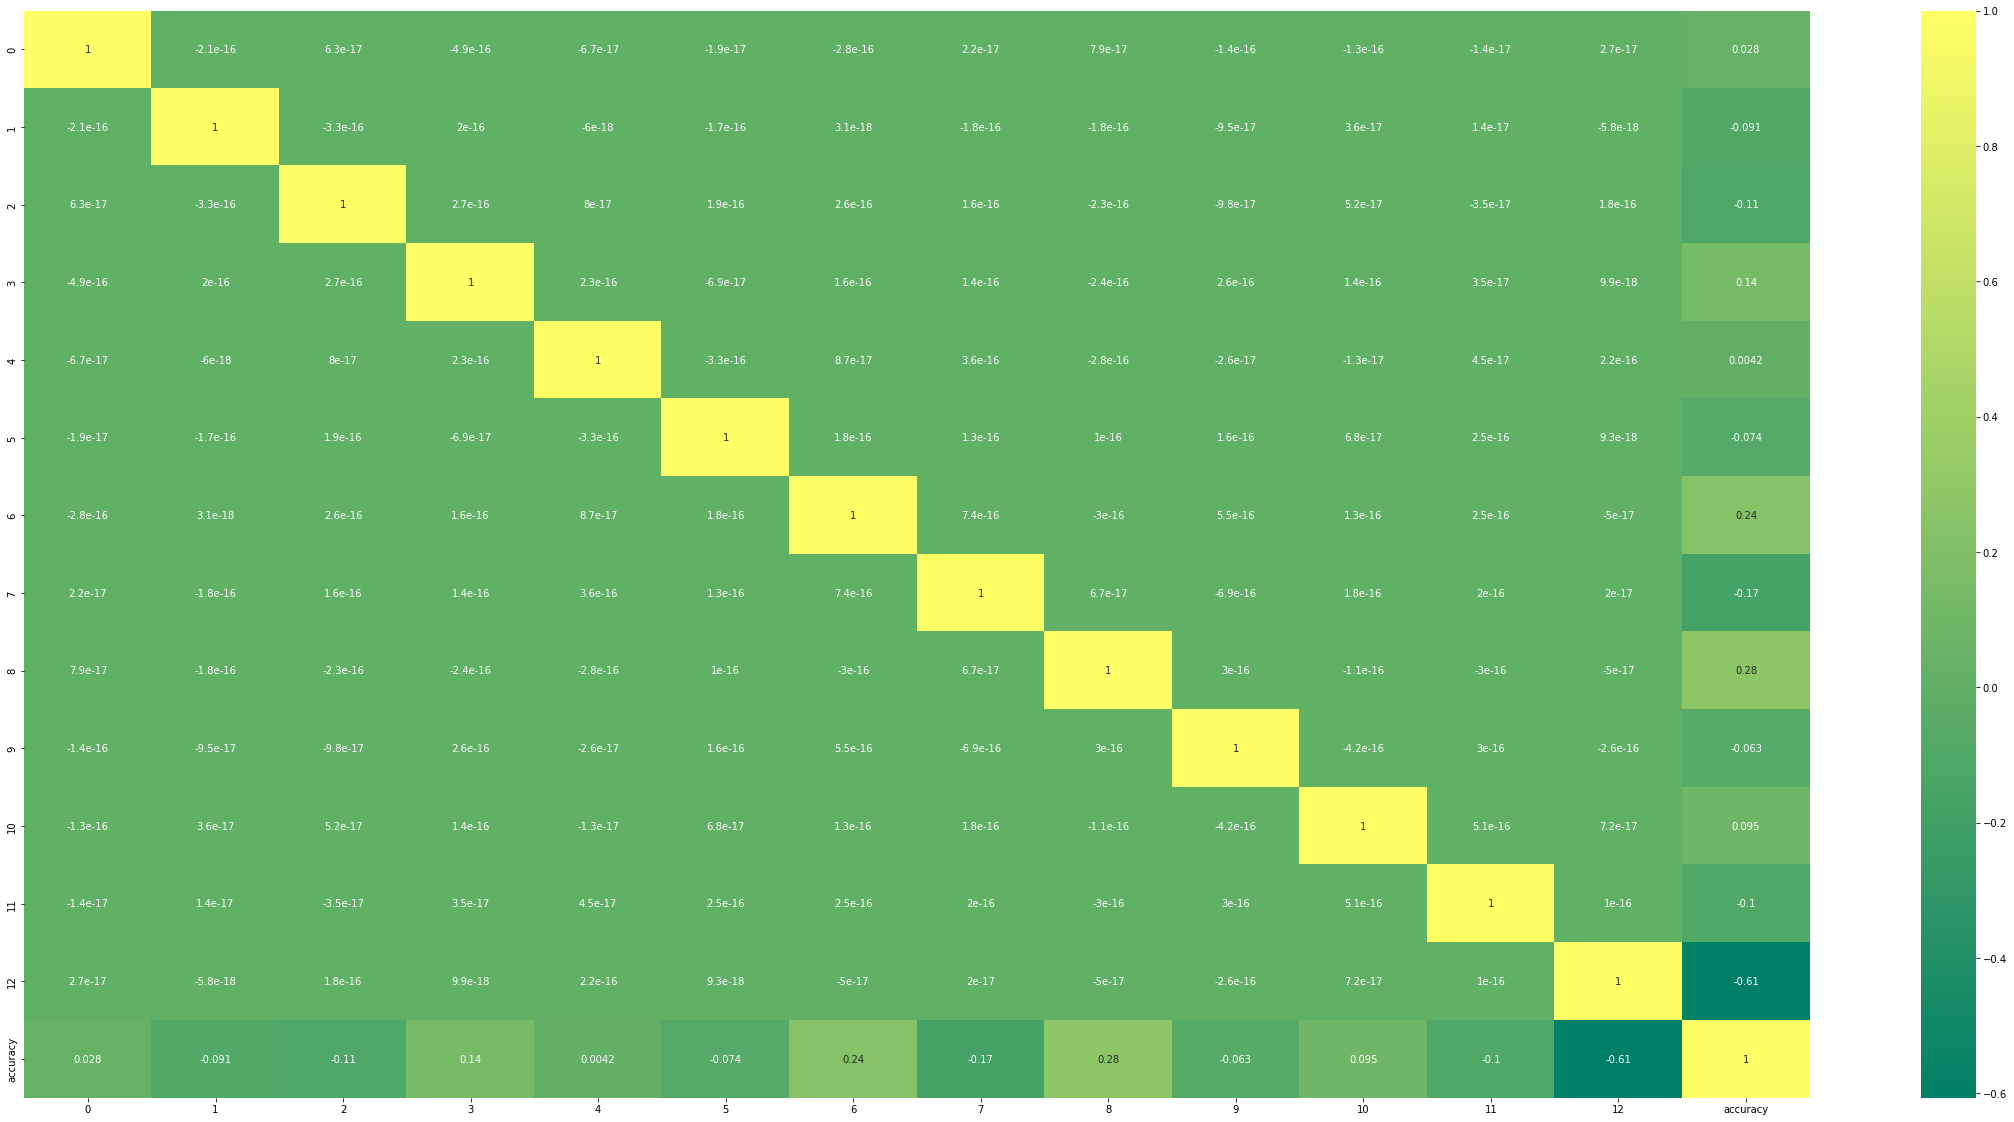

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap( dataset_afterpca.corr(), annot=True, cmap="summer" )

In [ ]:
X_PCA.n_components.iloc[12,:]

module1_accuracy                  -0.118025
module2_accuracy                   0.063364
module3_accuracy                  -0.003654
module4_accuracy                   0.054325
module5_accuracy                  -0.160414
module6_accuracy                  -0.034838
module7_accuracy                   0.036370
module8_accuracy                  -0.375642
module9_accuracy                  -0.000632
module10_accuracy                  0.003159
module11_accuracy                 -0.003208
machine1_year_from_buy             0.130955
machine2_year_from_buy             0.046269
machine3_year_from_buy             0.135475
machine4_year_from_buy            -0.055372
machine1_month_from_maintenance   -0.543036
machine2_month_from_maintenance   -0.015661
machine3_month_from_maintenance   -0.425709
machine4_month_from_maintenance    0.154544
average_age                       -0.509609
average_skill_score                0.076458
temperature                       -0.018264
humidity                        

#從heat map可以看出，整個產程的精確度在PCA後與第十三主成份（負）相關度最高，
#以下用scatter plot呈現

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0, flags=flags)


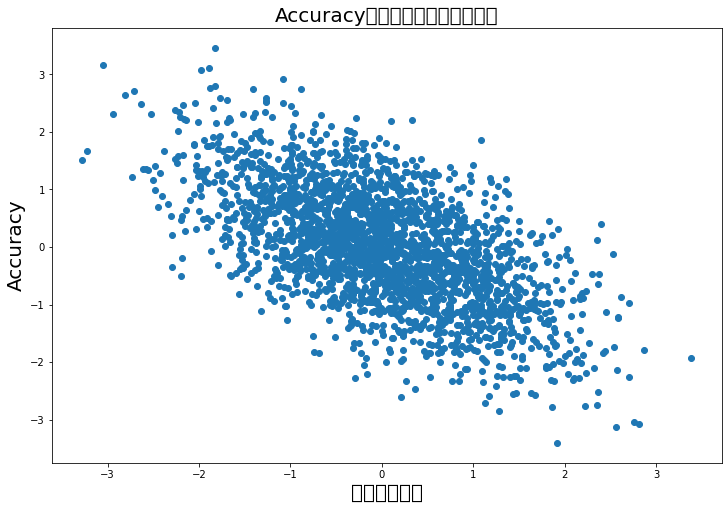

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Accuracyと第十三主成分の関係性",fontdict={'fontsize': 20})
plt.xlabel("第十三主成分",fontdict={'ontsize': 20})
plt.ylabel("Accuracy",fontdict={'fontsize': 20})
plt.scatter(dataset_afterpca["12"],dataset_afterpca["accuracy"])

#用stepwise(AIC)法選擇投入模型的變數

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# 統計解析用ライブラリ statsmodels 内にあるライブラリ stats.outliers_influence から
# 分散拡大係数（VIF）計算用メソッド variance_inflation_factor をインポート
from statsmodels.stats.outliers_influence import variance_inflation_factor

# オブジェクトのコピーを行うためのモジュール copy をインポート
import copy

# 数学的な関数を使うためのライブラリ math をインポート
import math

In [ ]:
# AICを計算する関数 calcAIC
def calcAIC(x, y_data, y_predict):
  colNum = len(x.columns)
  rowNum = x.count()[0]
  y_data = y_data.values
  RSS = ( ( y_data - y_predict ) * ( y_data - y_predict ) ).sum()
  AIC = rowNum * ( math.log( 2 * math.pi * RSS / rowNum ) + 1 ) + 2 * ( colNum + 2 )
  return AIC

In [ ]:
# AICを基準としたステップワイズ法で変数選択された重回帰分析を実行する関数 LR_stepwise_AIC
def LR_stepwise_AIC(X, y, maxIter=100):
  # 回帰分析のためのインスタンスをつくる
  reg = linear_model.LinearRegression()
  returnReg = linear_model.LinearRegression()
  # 最終モデルの項目リストを定義しておく
  orgColList = X.columns
  modelColList = []
  maxR2modelColList = []
  modelCoef = 0
  modelIntercept = 0
  modelR2 = 0
  modelAIC = 1000000000
  residueColList = copy.copy(orgColList)
  # 
  count = 0
  while count < maxIter:
    count = count + 1
    for i in range(len(residueColList)):
      tmpColList = copy.copy(modelColList)
      if residueColList[i] in tmpColList:
        if len(tmpColList) > 1:
          tmpColList.remove( residueColList[i] )
        else:
          continue
      else:
        tmpColList.append( residueColList[i] )
      tmp_X = X.loc[:,tmpColList]
      reg.fit(tmp_X, y)
      if modelAIC > calcAIC(tmp_X, y, reg.predict(tmp_X) ):
        maxR2modelColList = copy.copy(tmpColList)
        modelR2 = reg.score(tmp_X, y)
        modelAIC = calcAIC(tmp_X, y, reg.predict(tmp_X) )
        print("model update: variables:" + str(maxR2modelColList) + ", AIC: " + str(modelAIC) )
        returnReg = copy.copy(reg)
    modelColList = copy.copy(maxR2modelColList)
  return returnReg, modelColList

In [ ]:
dataset_reg = pd.read_csv(myfolder + "productQuality.csv")

# 目的変数と説明変数に分割
X_var = dataset_reg.loc[:,columns]
y_var = dataset_reg.loc[:,["accuracy"]]

# モデル構築用データ、モデル検証用データに分割（70:30に分割）
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1707, 23)
(732, 23)
(1707, 1)
(732, 1)


In [ ]:
std_object_x = StandardScaler()
std_object_x.fit(X_train)
std_X_train = pd.DataFrame(std_object_x.transform(X_train),columns=columns)
std_X_test = pd.DataFrame(std_object_x.transform(X_test),columns=columns)

std_object_y = StandardScaler()
std_object_y.fit(y_train)
std_y_train = pd.DataFrame(std_object_y.transform(y_train),columns=["accuracy"])
std_y_test = pd.DataFrame(std_object_y.transform(y_test),columns=["accuracy"])

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(std_X_train,std_y_train)
reg.score(std_X_train,std_y_train)

0.8078261268450962

In [ ]:
reg, columns = LR_stepwise_AIC(std_X_train, std_y_train, maxIter=10)

model update: variables:['module1_accuracy'], AIC: 4347.407589533129
model update: variables:['module1_accuracy', 'module4_accuracy'], AIC: 4343.49359495656
model update: variables:['module1_accuracy', 'module8_accuracy'], AIC: 3869.128563890078
model update: variables:['module1_accuracy', 'module8_accuracy', 'module4_accuracy'], AIC: 3868.590016565271
model update: variables:['module1_accuracy', 'module8_accuracy', 'machine3_year_from_buy'], AIC: 3742.461867840584
model update: variables:['module1_accuracy', 'module8_accuracy', 'machine1_month_from_maintenance'], AIC: 3228.887895803543
model update: variables:['module1_accuracy', 'module8_accuracy', 'machine1_month_from_maintenance', 'module4_accuracy'], AIC: 3226.9207584144424
model update: variables:['module1_accuracy', 'module8_accuracy', 'machine1_month_from_maintenance', 'machine3_year_from_buy'], AIC: 2992.780949902506
model update: variables:['module1_accuracy', 'module8_accuracy', 'machine1_month_from_maintenance', 'average_ag

# 結果可以得知，在AIC: 2064.7398306084683之後，分數沒有再明顯下降，因此投入模型的變數在做stepwise(AIC)法的結果是為 
#'module1_accuracy' 
#'module8_accuracy'
#'machine1_month_from_maintenance'
#'average_age'
#'machine3_year_from_buy'
#'humidity'

In [ ]:
columns_after_aic=['module1_accuracy', 'module8_accuracy', 'machine1_month_from_maintenance', 'average_age', 'machine3_year_from_buy', 'humidity']

# 目的変数と説明変数に分割
X_var_after_aic = dataset_reg.loc[:,columns_after_aic]
y_var_after_aic = dataset_reg.loc[:,["accuracy"]]

# モデル構築用データ、モデル検証用データに分割（70:30に分割）
X_train_after_aic, X_test_after_aic, y_train_after_aic, y_test_after_aic = train_test_split(X_var_after_aic, y_var_after_aic, test_size=0.3)
print(X_train_after_aic.shape)
print(X_test_after_aic.shape)
print(y_train_after_aic.shape)
print(y_test_after_aic.shape)

(1707, 6)
(732, 6)
(1707, 1)
(732, 1)


In [ ]:
std_object_x_after_aic = StandardScaler()
std_object_x_after_aic.fit(X_train_after_aic)
std_X_train_after_aic = pd.DataFrame(std_object_x_after_aic.transform(X_train_after_aic),columns=columns_after_aic)
std_X_test_after_aic = pd.DataFrame(std_object_x_after_aic.transform(X_test_after_aic),columns=columns_after_aic)


In [ ]:
std_object_y_after_aic = StandardScaler()
std_object_y_after_aic.fit(y_train_after_aic)
std_y_train_after_aic = pd.DataFrame(std_object_y_after_aic.transform(y_train_after_aic),columns=["accuracy"])
std_y_test_after_aic = pd.DataFrame(std_object_y_after_aic.transform(y_test_after_aic),columns=["accuracy"])

In [ ]:
reg_after_aic = linear_model.LinearRegression()
reg_after_aic.fit(std_X_train_after_aic,std_y_train_after_aic)
reg_after_aic.score(std_X_train_after_aic,std_y_train_after_aic)

0.8009486500981085

In [ ]:
reg_after_aic.coef_

array([[0.51290725, 0.42013047, 0.41885673, 0.32094999, 0.20652469,
        0.189072  ]])

結果分析：

在這個產程下，產程精度和以下變數有正相關

通過零件1和零件8進行採樣獲得的尺寸精度，

自上次維護機器 1 以來的月數，

員工的平均年齡，

自購買機器 3 和

製造室外的平均濕度。


再從訓練結果可以看出

減少機器 1 的維護月數，

重視老員工的福利，

降低機器3的設定使用壽命，

更加著重對生產室內外的濕度控管，

不僅能提高了產品的精度質量，

減少故障機器數量->減少耗損成本的目標也能實現。